<a href="https://colab.research.google.com/github/Felipe-Loureiro/Trainee-CIS-2024/blob/main/Periodo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data = pd.read_csv('/content/drive/MyDrive/UnB/IEEE Computational Intelligence Society, UnB/PS 2024/Periodo 3/Mall_Customers.csv')

In [30]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
data.shape

(200, 5)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##1. Visualize o scatterplot em matriz com hue = “Gender”. Dá para notar alguma diferença? Se sim, qual e por quê?

Não foi possível notar diferença, uma vez que as distribuições são muito p´roximas entre os gêneros.

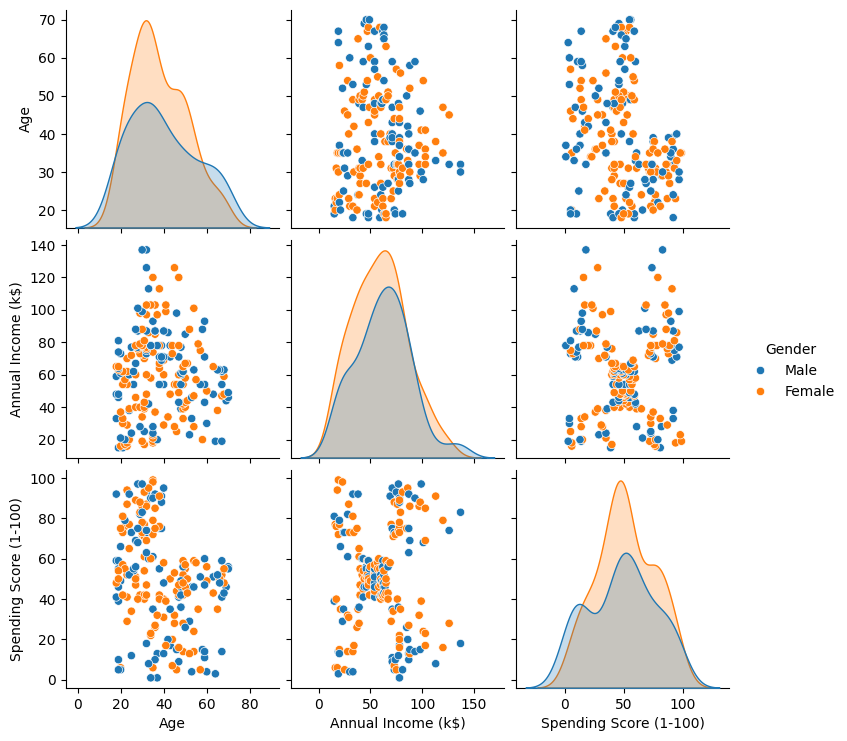

In [33]:
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue="Gender")
plt.show()

##2. Crie um DataFrame apenas com colunas Annual Income e Spending Score.


In [34]:
df= data[['Annual Income (k$)', 'Spending Score (1-100)']]
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


##3. Import o K-means.


In [35]:
from sklearn.cluster import KMeans

#4. Crie o modelo em cluster padrão, sem especificar a quantidade K de clusters.

In [36]:
KMeans().get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-37-36dedceb7c52>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = TESTE.labels_


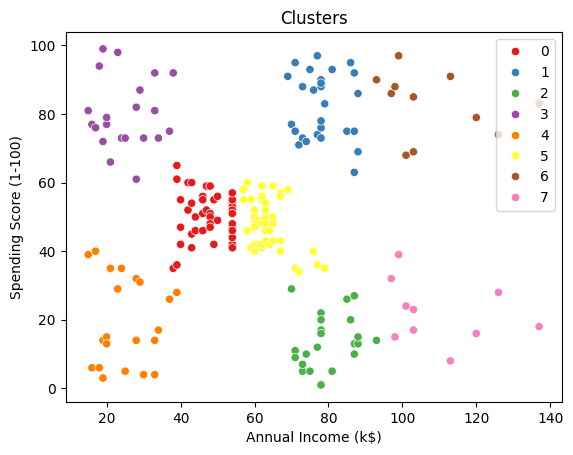

In [37]:
TESTE = KMeans(random_state=0)
TESTE.fit(df)

df['Cluster'] = TESTE.labels_

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title('Clusters')
plt.legend()
plt.show()

#5. Crie uma curva de cotovelo. Qual seria o número ideal de clusters?
O número ideal é de 5 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

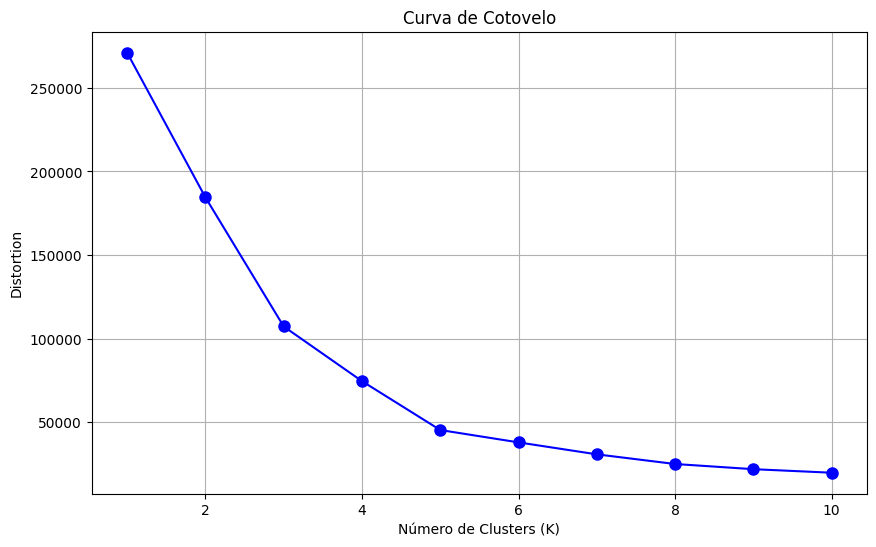

In [38]:
def calcular_curva_cotovelo(data):
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    return K, distortions

# Calcular a curva de cotovelo
K, distortions = calcular_curva_cotovelo(df)

# Plotar a curva de cotovelo
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bo-', markersize=8)
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Distortion')
plt.title('Curva de Cotovelo')
plt.grid(True)
plt.show()

#6. Crie novamente o cluster com kmeans com a quantidade de n_clusters ajustada. Compare os resultados e comente.
Visualmente, os clusters parecem fazer mais sentido
(ver gráfico a seguir)

#7. Quais foram os centroids? Imprima os centroids

(ver resultado a seguir)

#8. Mostra o gráfico do resultado com os centroids

(ver gráfico a seguir)


In [39]:
# Criar o modelo K-means com 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=0)
kmeans_5.fit(df)

# Obter os centroides
centroids = kmeans_5.cluster_centers_
print(centroids)

[[55.2962963  49.51851852  2.4691358 ]
 [86.53846154 82.12820513  2.41025641]
 [26.30434783 20.91304348  3.65217391]
 [25.72727273 79.36363636  2.86363636]
 [88.2        17.11428571  3.6       ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<ipython-input-40-62d84b8fa367>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans_5.labels_


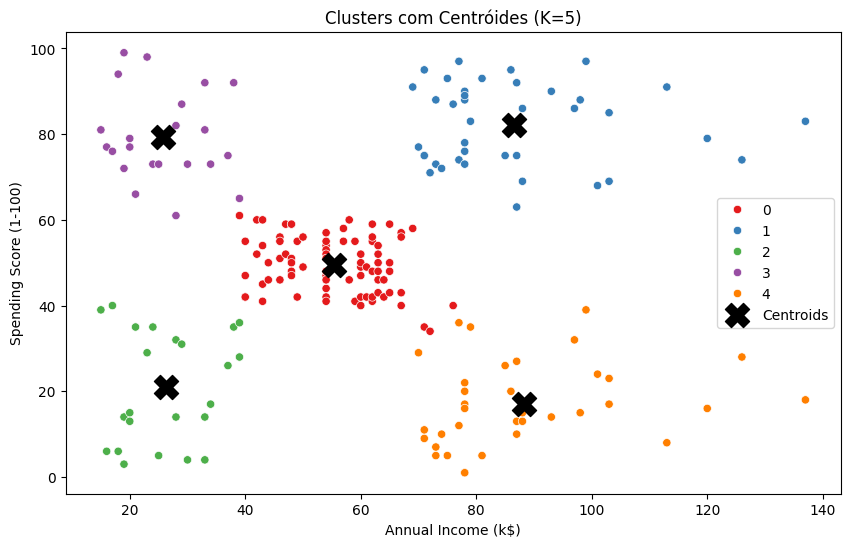

In [40]:
# Adicionar os clusters ao DataFrame
df['Cluster'] = kmeans_5.labels_

# Plotar os clusters e os centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', label='Centroids', marker='X')
plt.title('Clusters com Centróides (K=5)')
plt.legend()
plt.show()

#9. Analise o resultado. Pra qual grupo você direcionaria com maior prioridade a campanha de marketing?
Para o grupo 1, uma vez que têm mais dinheiro e estão mais dispostos a gastá-lo.